# HW04: Problem 3: Feature Selection

## Description

In this problem we will work with the diabetes dataset from sklearn. This data set is for a regression problem where 10 features are used to predict the progression of diabetes. The dataset is described in more detail [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). You task here is to use multiple techniques of feature selection to try to interpret the strength of the features in the dataset. You will need to use the following techniques:

- Pearson correlation coefficient using r_regression from sklearn (univariate feature selection)
- Mutual information using mutual_info_regression from sklearn (univariate feature selection)
- Random forest feature importance using RandomForestRegressor from sklearn (multivariate feature selection)
- Recursive feature elimination using sklearn.feature.selection.RFE with a Support Vector Regressor SVR (multivariate feature selection)

For each method you will need to plot the feature importance as a bar graph. The importance goes by different names in different algorithms. For example, in r_regression it is just the output (r value) and the mutual information in mutual_info_regression. In random variable it is called feature_importance_ and in RFE it is the ranking_. The bar graph will be sorted from most important features to least important features, with the y value being the importance of that feature, and the x value being the rank but labeled with the feature name.
You will also need to print out the top 5 features for each method. You will need to use the following code to load the data and split it into training and testing sets. You will need to use the training set for all of the feature selection methods.

* Are there 3 features that are selected in the top 5 by all 4 methods? 
* If so, what are they? 
* If not, what are the 3 features that are selected by the most methods? 
* How would it be possible that univariate methods might select different features than multivariate methods? 
* How does dependence between features affect the feature selection methods?

For good habits, make sure you split your code into training and testing. You may not even use the testing data but when you do any analysis such as feature selection, remember you must not use the testing data. You should also make sure you use the same random seed for all of your feature selection methods so that you can compare the results.

## Hints: In sorting features you use "arg" sort. This will return the indices of the sorted array. You can use these indices to sort the feature names.

This kind of code will be useful for plotting the bar graph:

```python
r_inds = np.argsort(np.abs(r_importance))[::-1]
fig, ax = plt.subplots()
rank = np.arange(len(data.feature_names))
ax.bar(rank, r_importance[r_inds])
ax.set_xticks(rank)
ax.set_xticklabels(np.array(data.feature_names)[r_inds])
```

In [1]:
# Some imports you will need
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from numpy import corrcoef
import seaborn as sns
from sklearn.feature_selection import r_regression, f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import pandas as pd
from sklearn.linear_model import LinearRegression

## Loading and preparing the data

In [2]:
# Load the diabetes data set as X, y
X, y = load_diabetes(return_X_y=True)
# Load the diabetes data set as data to read the description
data = load_diabetes()

In [3]:
# Print out the DESCR attribute to inpect the variables
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
# Print the array of feature names
feature_names = data.feature_names
print(feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:
# Split the Data into train/testing sets
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Check the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (353, 10)
Shape of X_test: (89, 10)
Shape of y_train: (353,)
Shape of y_test: (89,)


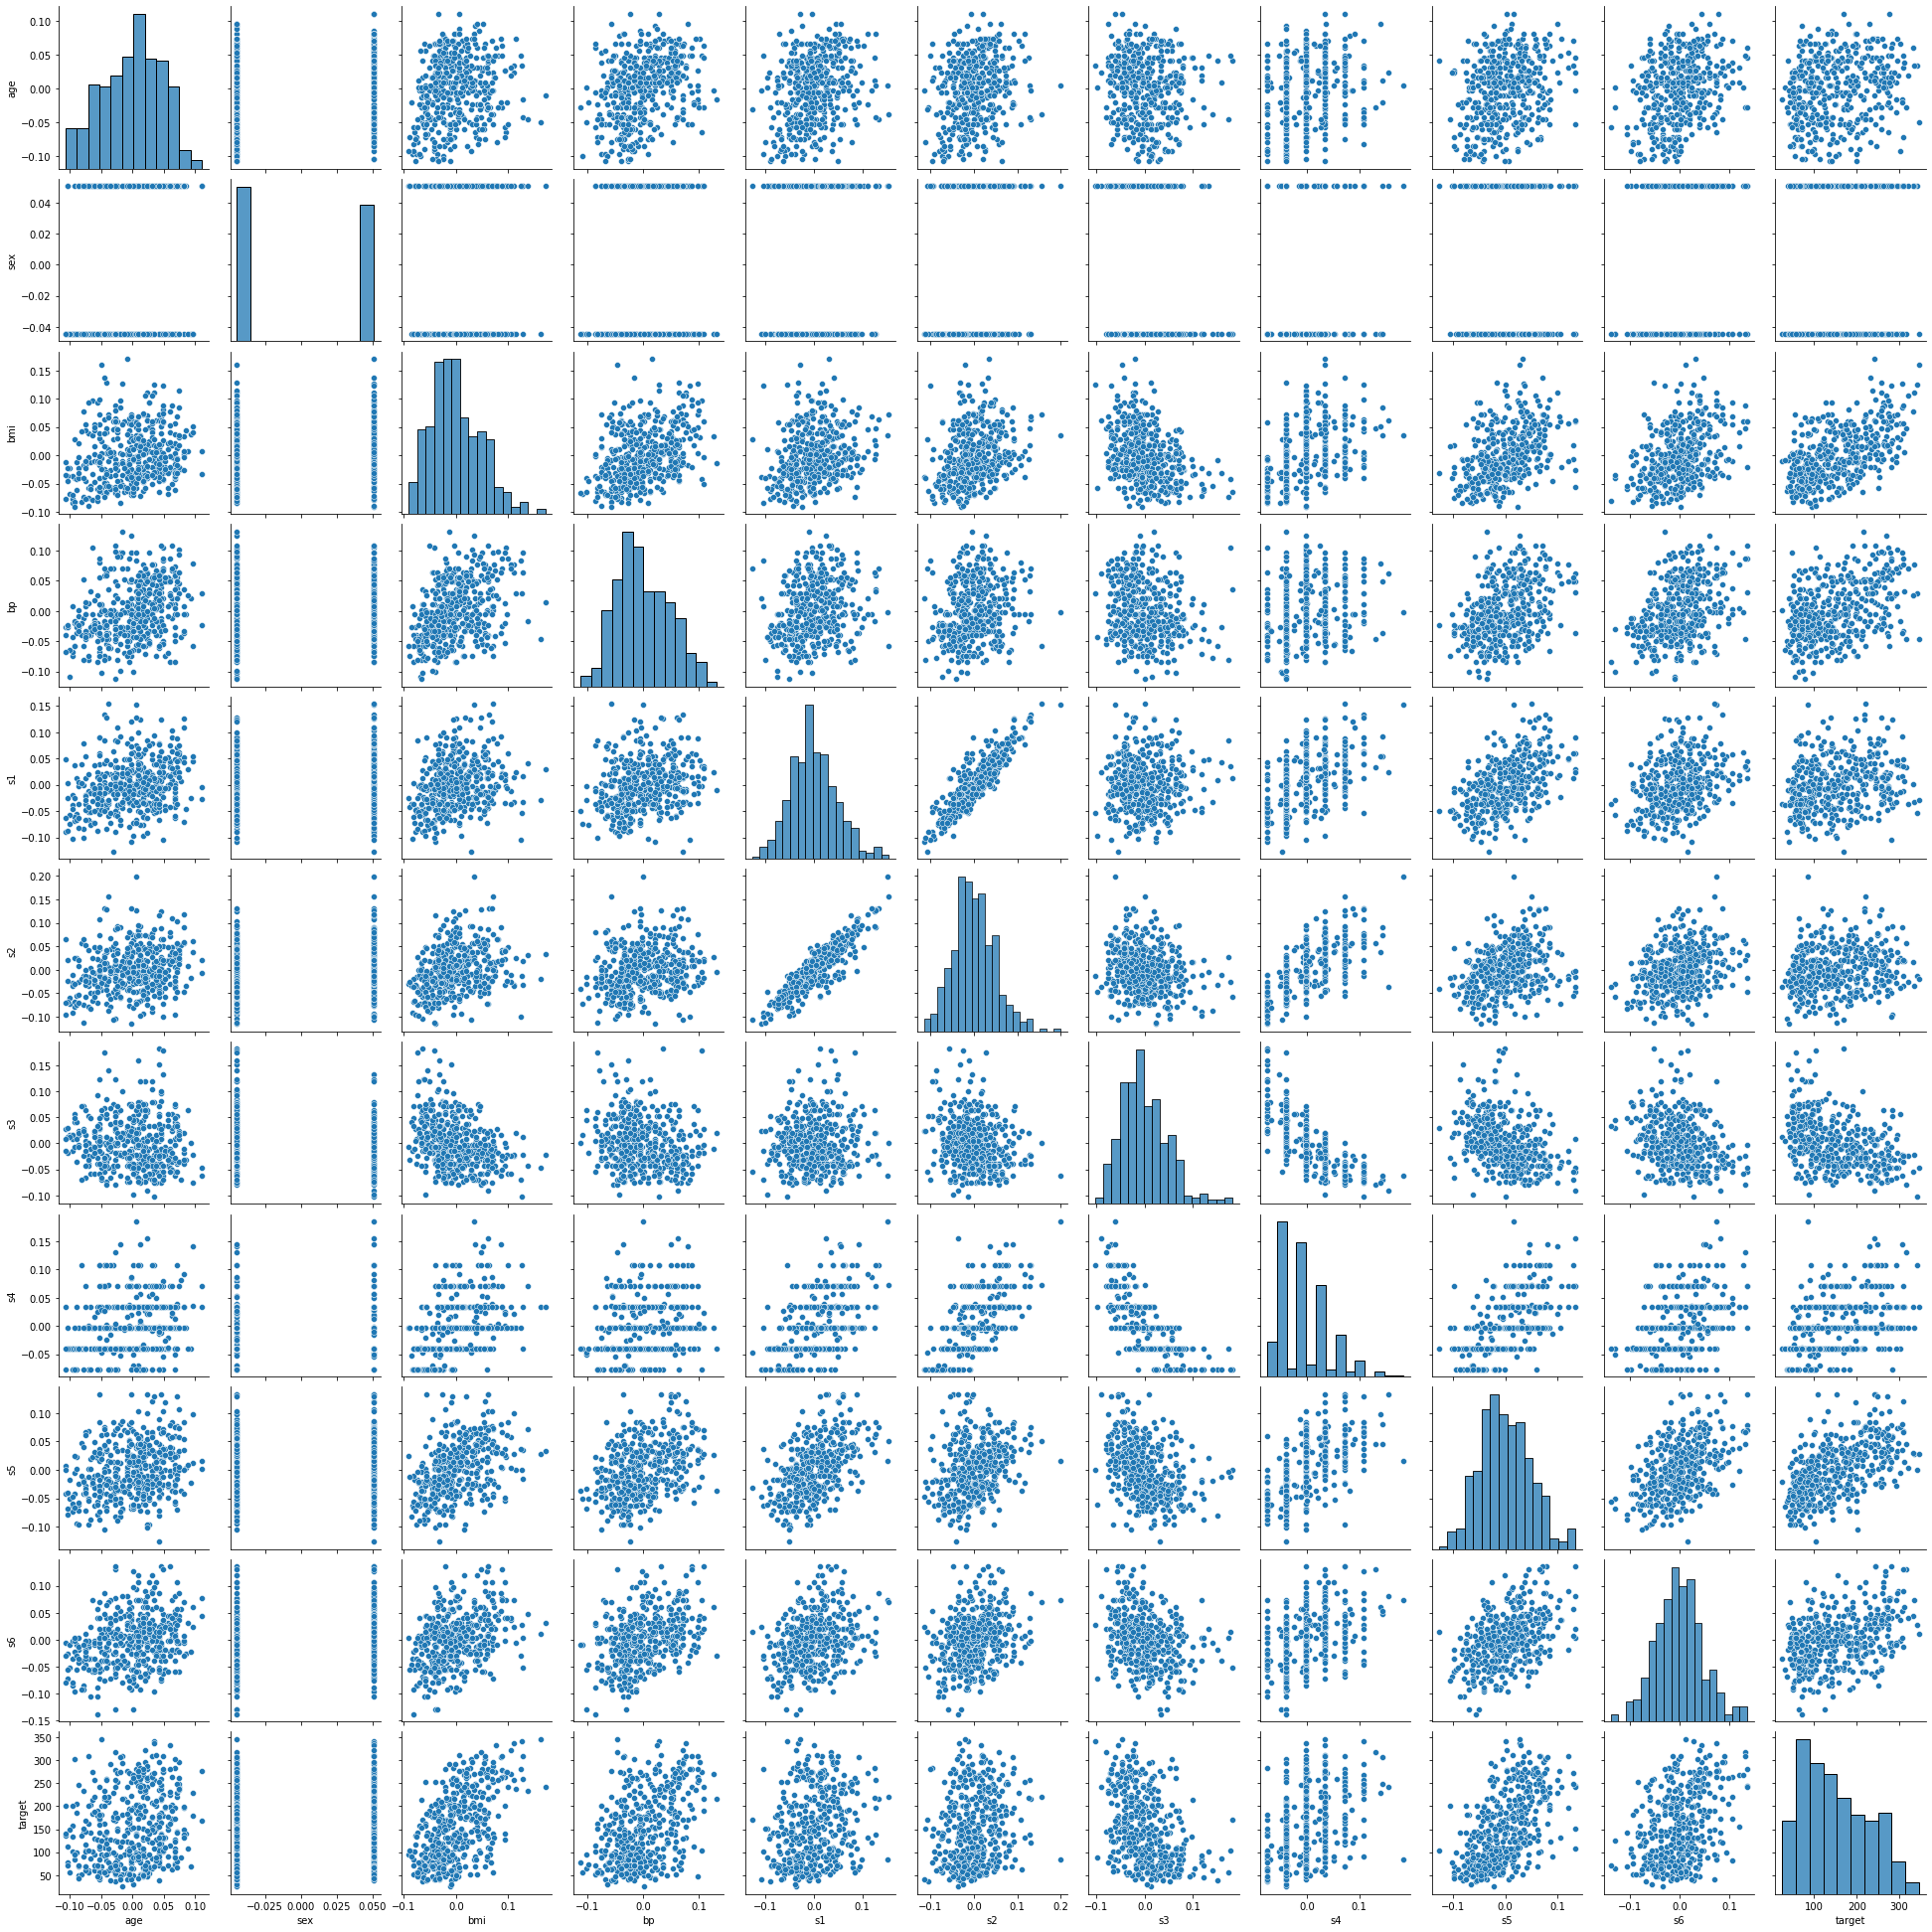

In [7]:
# Do a pair plot 
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Create a pair plot
sns.pairplot(df)
plt.show()

Q: What does the EDA tell you about the data?

A: There seems to be a linear relationship between s2 and s1 features, it indicates potential correlations between these pairs of features. A linear relationship between s1 and s2 features suggests that changes in one feature are associated with proportional changes in the other feature. Also, from the scatter plot, the s4 and target variable shows some pattern.  

## Univariate feature selection with r_regression

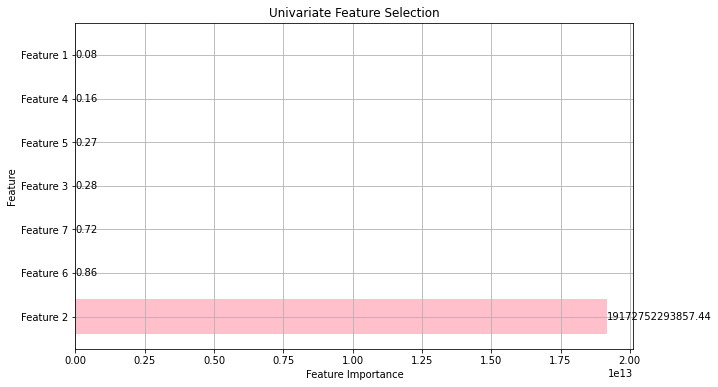

In [17]:
# Use r_regression to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph

X, y = make_regression(n_samples=50, n_features=7, n_informative=1, noise=1e-4, random_state=42)
feature_scores, _ = f_regression(X, y)

sorted_indices = np.argsort(np.abs(feature_scores))[::-1]
sorted_scores = feature_scores[sorted_indices]
sorted_names = np.array(['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7'])[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_scores)), sorted_scores, color='pink', align='center')
plt.yticks(range(len(sorted_scores)), sorted_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Univariate Feature Selection')

# Add signed values of y to the plot
for i, score in enumerate(sorted_scores):
    plt.text(score, i, f'{score:.2f}', ha='right' if score < 0 else 'left', va='center', color='black')

plt.grid(True)
plt.show()

In [9]:
# print the top 5 features according to r_regression?
print("Top 5 features according to the feature importance scores according to r_regression:")
for i in range(5):
    print(f"{sorted_names[i]}: {sorted_scores[i]}")

Top 5 features according to the feature importance scores according to r_regression:
Feature 2: 19172752293857.438
Feature 6: 0.8602255668852301
Feature 7: 0.7204437945856634
Feature 3: 0.2843848080189961
Feature 5: 0.270386914527086


## Univariate feature selection with mutual information using mutual_info_regression

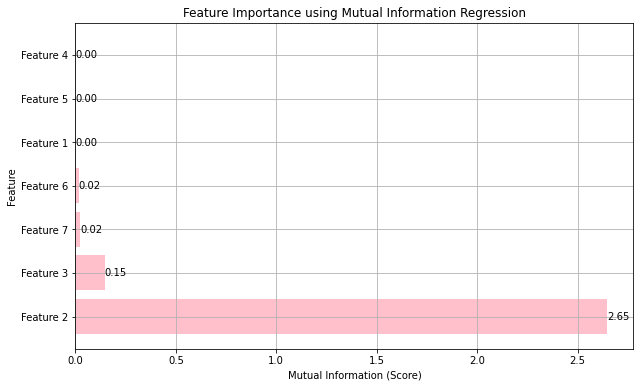

In [18]:
# Use mutual_info_regression to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph
feature_scores1 = mutual_info_regression(X, y)

sorted_indices1 = np.argsort(np.abs(feature_scores1))[::-1]
sorted_scores1 = feature_scores1[sorted_indices1]
sorted_names1 = np.array(['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7'])[sorted_indices1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_scores1)), sorted_scores1, color='pink', align='center')
plt.yticks(range(len(sorted_scores1)), sorted_names1)
plt.xlabel('Mutual Information (Score)')
plt.ylabel('Feature')
plt.title('Feature Importance using Mutual Information Regression')

for i, score in enumerate(sorted_scores1):
    plt.text(score, i, f'{score:.2f}', ha='right' if score < 0 else 'left', va='center', color='black')

plt.grid(True)
plt.show()

In [11]:
# What are the top 5 features according to mutual_info_regression?
print("Top 5 features according to mutual_info_regression:")
for i in range(5):
    print(f"{sorted_names1[i]}: {sorted_scores1[i]}")

Top 5 features according to mutual_info_regression:
Feature 2: 2.645872004996092
Feature 3: 0.14519042474251442
Feature 7: 0.023037237388487064
Feature 6: 0.01672810779753764
Feature 1: 0.0009573912818736652


## Multivariate feature selection with Random Forest feature_importance_

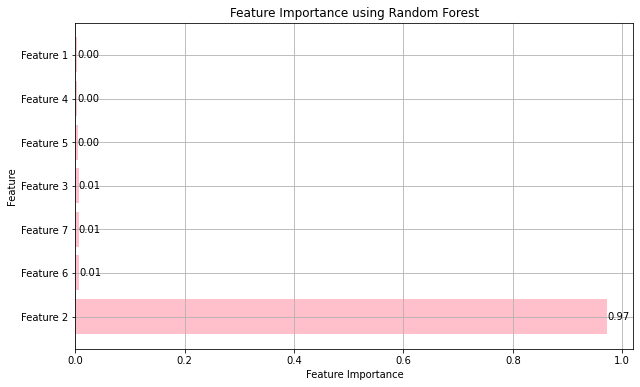

In [19]:
# Use random forest feature_importance_ to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

feature_importances = model.feature_importances_

sorted_indices2 = np.argsort(np.abs(feature_importances))[::-1]
sorted_importances2 = feature_importances[sorted_indices2]
sorted_names2 = np.array(['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7'])[sorted_indices2]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances2)), sorted_importances2, color='Pink', align='center')
plt.yticks(range(len(sorted_importances2)), sorted_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forest')

for i, importance in enumerate(sorted_importances2):
    plt.text(importance, i, f'{importance:.2f}', ha='right' if importance < 0 else 'left', va='center', color='black')

plt.grid(True)
plt.show()

In [13]:
# What are the top 5 features according to random forest feature_importance_?
print("Top 5 features according to random forest feature_importance_:")
for i in range(5):
    print(f"{sorted_names2[i]}: {sorted_importances2[i]}")

Top 5 features according to random forest feature_importance_:
Feature 2: 0.9719844417027497
Feature 5: 0.00646367143989618
Feature 6: 0.005937464887868755
Feature 4: 0.005614961384293857
Feature 7: 0.004030841135774253


## Multivariate feature selection with recursive feature elimination (RFE) using a support vector regressor

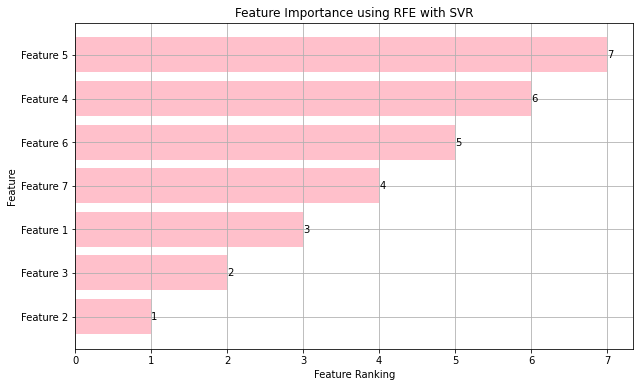

In [20]:
# Use recursive feature elimination (RFE) with a support vector regressor 
# to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph

estimator = SVR(kernel='linear')
rfe = RFE(estimator, n_features_to_select=1, step=1)
rfe.fit(X, y)
feature_ranking = rfe.ranking_

sorted_indices3 = np.argsort(np.abs(feature_ranking))
sorted_rankings = feature_ranking[sorted_indices3]
sorted_names3 = np.array(['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7'])[sorted_indices3]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_rankings)), sorted_rankings, color='pink', align='center')
plt.yticks(range(len(sorted_rankings)), sorted_names3)
plt.xlabel('Feature Ranking')
plt.ylabel('Feature')
plt.title('Feature Importance using RFE with SVR')

for i, ranking in enumerate(sorted_rankings):
    plt.text(ranking, i, f'{ranking}', ha='right' if ranking < 0 else 'left', va='center', color='black')

plt.grid(True)
plt.show()

In [15]:
# What are the top 5 features according to RFE with SVR?
print("Top 5 features according to RFE with SVR:")
for i in range(5):
    print(f"{sorted_names3[i]}: {sorted_rankings[i]}")

Top 5 features according to RFE with SVR:
Feature 2: 1
Feature 3: 2
Feature 1: 3
Feature 7: 4
Feature 6: 5


## Conclusions

Q1: Are there 3 features that are selected in the top 5 by all 4 methods?

A1: There are 2 feature selected in the top 5 by all 4 methods which are Feature 2 and Feature 6.

Q2: If so, what are they? / If not, what are the 3 features that are selected by the most methods? 

A2: Feature 2, Feature 6 are selected by all 4 models and Feature 3 is selected by most methods.

Q3: How would it be possible that univariate methods might select different features than multivariate methods?

A3: Univariate methods assess the relationship between each feature and the target variable independently, without considering interactions or dependencies between features. They select features based solely on their individual predictive power. On the other hand, multivariate methods consider the joint relationship between multiple features and the target variable, taking into account interactions and dependencies between features.

Q4: How does dependence between features affect the feature selection methods?

A4: Dependence between features can significantly affect feature selection methods. When features are highly correlated or redundant, it can lead to instability and inconsistency in the selection process. For example, in univariate methods, highly correlated features may receive similar importance scores, making it difficult to distinguish between them and resulting in arbitrary selections. In multivariate methods, dependence between features can distort the estimation of feature importance or contribution, leading to biased results. Additionally, dependence between features can increase the complexity of the model and the risk of overfitting. Therefore, it's important to address feature dependence or multicollinearity appropriately to obtain reliable feature selection results.